# Predizendo visualizações mensais no YouTube


O objetivo deste notebook é analisar o dataset que pode ser encontrado no seguinte [link](https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023) e criar um modelo de machine learning que seja capaz de predizer a quantia de visualizações mensais em um canal do youtube.


### Análise exploratória

Nesta etapa será feita toda a análise dos dados afim de entender melhor o dataset.

In [109]:
# Permitindo o acesso do colab a pasta onde está o dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [111]:
# Abrindo o csv
df = pd.read_csv("/content/drive/MyDrive/Eng-Comp/Módulo VII/Programação/PONDERADA - III/Global YouTube Statistics.csv", encoding='unicode_escape')
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [112]:
# Executando um describe para entender melhor cada coluna
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


Como o objetivo do modelo é prever as visualizações mensais de algum canal. Irei criar uma matriz de correlação para entender como as features se relacionam.


In [113]:
# Criando a matriz de correlação
correlation_matrix = df.corr()


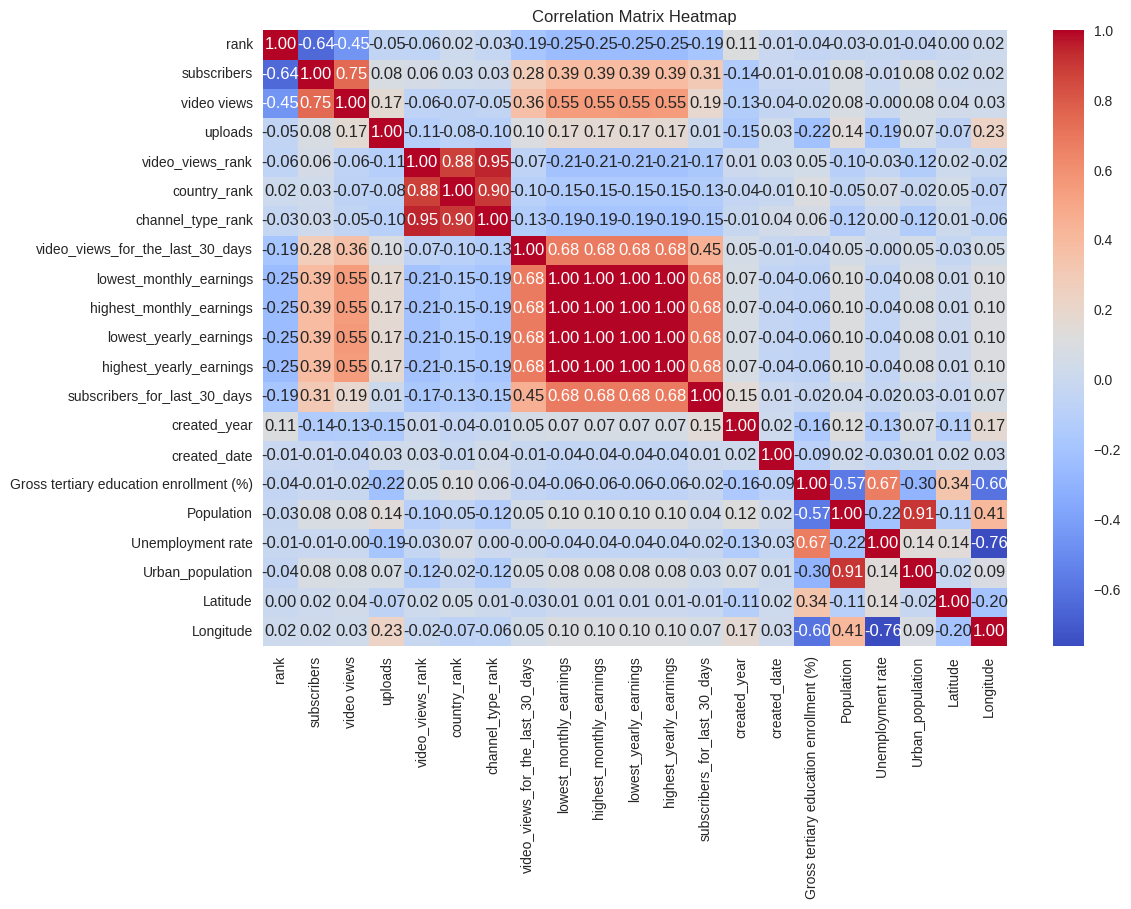

In [114]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Ao analisar a matriz é possível notar algumas correlações.
Assim, vou remover todas as colunas que tenham correlação maior que 0.6 na feature alvo que é ***video_views_for_the_last_30_days*** .

De tal modo que as seguintes colunas serão removidas :

*   lowest_monthly_earnings                      
*   highest_monthly_earnings                     
*   lowest_yearly_earnings                       
*   highest_yearly_earnings     




In [115]:
# Removendo as colunas que tem maior correlação com a feature alvo
df_low_corr = df.drop(columns=['lowest_monthly_earnings','highest_monthly_earnings','lowest_yearly_earnings','highest_yearly_earnings'])
df_low_corr

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


Ao analisar o dataset é possível notar que há um grande número de NaN, então será feita uma análise mais a fundo dos dados nulos.
Já levando em conta as colunas que serão utilizadas pelo modelo

In [116]:
# Mostrando o número de NaN em todas colunas
nan_number = df_low_corr.isna().sum()
nan_number

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date                                 5
Gross tertiary education enrollment (%)    123
Population                                 123
Unemployment rate                          123
Urban_populat

Dado que tais linhas que tem dados nulos poderem interferir no modelo. Irei optar por deletar todas as linhas que contenham dados nulos nas colunas de população, país e mês que foi criado.

In [117]:
# Deletando linhas com nulos
df_low_corr = df_low_corr.dropna(subset=['Population','Country','created_month'])


In [118]:
# Resultado das transformações
nan_number = df_low_corr.isna().sum()
nan_number

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    39
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                                 0
channel_type                                 6
video_views_rank                             0
country_rank                                 0
channel_type_rank                            7
video_views_for_the_last_30_days            19
subscribers_for_last_30_days               272
created_year                                 0
created_month                                0
created_date                                 0
Gross tertiary education enrollment (%)      0
Population                                   0
Unemployment rate                            0
Urban_populat

Após remover tais linhas, irei tratar os dados nulos como números 0 e outras váriaveis que sejam diferentes de número.

In [119]:
df_low_corr.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


As seguintes colunas são compostas por strings e têm tais características:

* Youtuber
  * nome do canal
* category
  * que categoria o canal se enquadra
* Title
  * nome do canal ao interagir com usúarios
* Country
  * país de origem do canal
* Abbreviation
  * abreviação do nome do país
* channel_type
  * tipo de contéudo que o canal cria
* created_month
  * mês do ano que o canal foi criado






Apesar da matriz de correlação não ter indicado, algumas colunas causariam enorme correlação com o número de views, portando irei deleta-las e fazer tratamentos de dados nas restantes.

In [120]:
# Deletando colunas que não serão usadas
df_low_corr = df_low_corr.drop(['Youtuber','Title','Abbreviation'], axis=1)

In [121]:
df_low_corr.columns

Index(['rank', 'subscribers', 'video views', 'category', 'uploads', 'Country',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [122]:
# Checando se a coluna está ok
df_low_corr['created_month'].unique()


array(['Mar', 'Feb', 'Sep', 'May', 'Apr', 'Jan', 'Jun', 'Aug', 'Jul',
       'Dec', 'Oct', 'Nov'], dtype=object)

In [123]:
# Criando um dicionário com todos os meses do ano
months_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3,
               'Apr': 4, 'May': 5, 'Jun': 6,
               'Jul': 7, 'Aug': 8, 'Sep': 9,
               'Oct': 10, 'Nov': 11, 'Dec': 12}

# Substituindo no dataframe
df_low_corr['created_month'] = df_low_corr['created_month'].replace(months_dict)
df_fixing = df_low_corr

In [124]:
df_fixing.head(4)

,rank,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,country_rank,channel_type_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,Music,20082,India,Music,1.0,1.0,1.0,...,2000000.0,2006.0,3,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,Film & Animation,1,United States,Games,4055159.0,7670.0,7423.0,...,NaN,2006.0,3,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,48.0,1.0,1.0,...,8000000.0,2012.0,2,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,Education,966,United States,Education,2.0,2.0,1.0,...,1000000.0,2006.0,9,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


Dado o tamanho das outras colunas e a quantia de dados optarei por aplicar um label encoding para transformar todas as colunas de string restantes em números.

In [125]:
# Colunas que serão convertidas
columns_to_encode = ['category', 'Country', 'channel_type']


In [126]:
# Dicionário que guardara todas as chaves valor do label encoding
label_encoding_dicts = {}


# Loop que convert as colunas e salva os valores respectivos num dicionário
for x in columns_to_encode:
    le = LabelEncoder()
    df_fixing[x] = le.fit_transform(df_fixing[x])
    key_value_dict = {label: idx for idx, label in enumerate(le.classes_)}
    label_encoding_dicts[x] = key_value_dict


df_fixing


,rank,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,country_rank,channel_type_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,8,20082,17,8,1.0,1.0,1.0,...,2000000.0,2006.0,3,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,4,1,45,6,4055159.0,7670.0,7423.0,...,NaN,2006.0,3,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,3,741,45,4,48.0,1.0,1.0,...,8000000.0,2012.0,2,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,2,966,45,3,2.0,2.0,1.0,...,1000000.0,2006.0,9,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,14,116536,17,4,3.0,2.0,2.0,...,1000000.0,2006.0,9,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,12300000,9.029610e+09,15,1200,5,4,525.0,55.0,172.0,...,700000.0,2017.0,2,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,12300000,1.674410e+09,11,1500,17,6,6141.0,125.0,69.0,...,300000.0,2018.0,9,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,12300000,2.214684e+09,18,2452,44,6,129005.0,867.0,1202.0,...,1000.0,2006.0,9,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,12300000,3.741235e+08,5,39,38,6,35112.0,4.0,69.0,...,100000.0,2012.0,5,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [127]:
# Anotando o que cada número corresponde, visando facilitar a futura predição
for column, label_mapping in label_encoding_dicts.items():
    print(f"Label Encoding Dictionary for '{column}':")
    print(label_mapping)

Label Encoding Dictionary for 'category':
{'Autos & Vehicles': 0, 'Comedy': 1, 'Education': 2, 'Entertainment': 3, 'Film & Animation': 4, 'Gaming': 5, 'Howto & Style': 6, 'Movies': 7, 'Music': 8, 'News & Politics': 9, 'Nonprofits & Activism': 10, 'People & Blogs': 11, 'Pets & Animals': 12, 'Science & Technology': 13, 'Shows': 14, 'Sports': 15, 'Trailers': 16, 'Travel & Events': 17, nan: 18}
Label Encoding Dictionary for 'Country':
{'Afghanistan': 0, 'Argentina': 1, 'Australia': 2, 'Bangladesh': 3, 'Barbados': 4, 'Brazil': 5, 'Canada': 6, 'Chile': 7, 'China': 8, 'Colombia': 9, 'Cuba': 10, 'Ecuador': 11, 'Egypt': 12, 'El Salvador': 13, 'Finland': 14, 'France': 15, 'Germany': 16, 'India': 17, 'Indonesia': 18, 'Iraq': 19, 'Italy': 20, 'Japan': 21, 'Jordan': 22, 'Kuwait': 23, 'Latvia': 24, 'Malaysia': 25, 'Mexico': 26, 'Morocco': 27, 'Netherlands': 28, 'Pakistan': 29, 'Peru': 30, 'Philippines': 31, 'Russia': 32, 'Samoa': 33, 'Saudi Arabia': 34, 'Singapore': 35, 'South Korea': 36, 'Spain': 3

Agora que os dados já estão todos categorizados, irei novamente contar os NaN's e preencher com zero os que ainda estão como nulos.

In [128]:
# Mostrando o número de NaN em todas colunas
rest_of_nan = df_fixing.isna().sum()
rest_of_nan

rank                                         0
subscribers                                  0
video views                                  0
category                                     0
uploads                                      0
Country                                      0
channel_type                                 0
video_views_rank                             0
country_rank                                 0
channel_type_rank                            7
video_views_for_the_last_30_days            19
subscribers_for_last_30_days               272
created_year                                 0
created_month                                0
created_date                                 0
Gross tertiary education enrollment (%)      0
Population                                   0
Unemployment rate                            0
Urban_population                             0
Latitude                                     0
Longitude                                    0
dtype: int64

In [129]:
# Substituindo todos os NaN por 0
df_fixing = df_fixing.replace(np.nan, 0)

In [130]:
# Mudando o nome do dataframe por motivos de simplificação
df_fixed = df_fixing

## Auto machine learning

Nesta etapa irei rodar um modelo de regressão linear com o pycaret visando encontrar a quantia de views mensais de determinado canal.

In [131]:
!pip install pycaret[full]

In [132]:
# Importando o pycaret
from pycaret.regression import *



In [133]:
# Visualizando o dataframe que sera utilizado no modelo
df_fixed.columns

Index(['rank', 'subscribers', 'video views', 'category', 'uploads', 'Country',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [134]:
df_fixed = df_fixed.drop(['rank'], axis=1)

In [135]:
# Definindo o setup do pycaret

s = setup(data = df_fixed,  target = 'video_views_for_the_last_30_days',  normalize=True )

,Description,Value
0,Session id,5657
1,Target,video_views_for_the_last_30_days
2,Target type,Regression
3,Original data shape,"(869, 20)"
4,Transformed data shape,"(869, 20)"
5,Transformed train set shape,"(608, 20)"
6,Transformed test set shape,"(261, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [139]:
# Comparando os modelos
compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,100394858.3927,111322983041446016.0000,258324186.9647,0.5037,3.7699,231464.6598,3.1960
ridge,Ridge Regression,111865876.2655,106211825206560000.0000,259469224.3694,0.4786,3.9377,1045861.1324,0.0420
lasso,Lasso Regression,112369972.9885,106354023780639040.0000,259857460.5184,0.4757,3.9521,1076078.9958,0.0720
llar,Lasso Least Angle Regression,112369973.0051,106354023780949312.0000,259857460.5236,0.4757,3.9521,1076078.9963,0.0880
lr,Linear Regression,112369976.7338,106354024655052384.0000,259857462.7793,0.4757,3.9521,1076079.1651,0.4960
en,Elastic Net,122021715.8893,109917996469200512.0000,265742217.3941,0.4606,3.9408,457950.9258,0.0650
et,Extra Trees Regressor,103260767.8279,115595527392238800.0000,266856632.3795,0.4190,3.1926,200313.8942,0.4290
lar,Least Angle Regression,120211910.6682,108907515986461600.0000,268511005.2745,0.4162,4.1348,1368388.0564,0.1100
omp,Orthogonal Matching Pursuit,130390436.4379,118909749449725056.0000,277239299.8701,0.3981,4.1556,535186.6358,0.0850
lightgbm,Light Gradient Boosting Machine,126761988.4285,118992484524762864.0000,280054914.0830,0.3327,4.1270,748424.3596,0.3430


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Dado a não linearidade desse problema o r^2 de 0.5 já é algo interessante para se começar.
Assim, irei criar o modelo e melhorar seus hiper parametros.

In [140]:
# Criando o melhor modelo
catboost_regressor = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,197382975.3270,671313275768420096.0000,819337095.3206,0.1120,4.8271,380097.4165
1,79651014.5155,18945490851625092.0000,137642620.0405,0.6241,4.0329,182426.7307
2,116728998.3309,79677903457736800.0000,282272746.5728,0.2304,3.4090,528.4928
3,63451715.7928,10658245210533998.0000,103238777.6494,0.7629,3.8839,280216.7522
4,66348252.3611,10026196751299602.0000,100130898.0850,0.7179,2.8303,107.5565
5,145053171.1449,150860844476718912.0000,388408090.1278,0.2244,3.1412,841994.2077
6,71658848.9577,22476101247900824.0000,149920316.3280,0.7090,5.6915,492961.7208
7,69021971.2135,11955742504646922.0000,109342317.9956,0.5327,2.5767,94.6189
8,86979523.9839,24820644172040692.0000,157545689.1573,0.5722,4.7053,136171.4338


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [141]:
# Melhorando o modelo
better_catboost = tune_model(catboost_regressor)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,226132016.0532,715442599776046336.0000,845838400.5092,0.0536,5.0971,675515.3843
1,76594226.1273,15368500376506404.0000,123969755.8944,0.6951,3.8925,96711.5187
2,114161041.7477,65708604756894480.0000,256336896.9869,0.3653,3.6176,3271.0094
3,79146707.9195,13966858333149006.0000,118181463.5768,0.6893,4.0849,91022.1089
4,62548082.1307,6888556100607165.0000,82997325.8642,0.8062,2.5525,2198.7153
5,167289888.7839,191048029550945728.0000,437090413.4741,0.0178,3.2931,1447069.6612
6,68699778.5469,23012963270785312.0000,151700241.4988,0.7020,5.8797,1941117.5581
7,55660041.7880,6773578012964486.0000,82301749.7564,0.7352,2.4121,23.6991
8,88038986.7750,27909345836820216.0000,167060904.5732,0.5190,4.6375,132711.8608


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [142]:
# Avaliando o modelo que foi melhorado
evaluate_model(better_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [143]:
# Fazendo uma predição de teste
predict_model(better_catboost);


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,94144518.2473,164121492589550560.0000,405119109.1390,0.2482,3.8427,85392.6090


In [144]:
# Finalizando o modelo
final_catboost = finalize_model(better_catboost)


In [145]:
save_model(final_catboost,'catboost', model_only=False)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['subscribers', 'video views',
                                              'category', 'uploads', 'Country',
                                              'channel_type', 'video_views_rank',
                                              'country_rank',
                                              'channel_type_rank',
                                              'subscribers_for_last_30_days',
                                              'created_year', 'created_month',
                                              'created_date',
                                              'Gross tertiary education '
                                              'enrollment (%)',
                                              'Population'...
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  Transfor

In [146]:
# Salvando o modelo
full_model = save_model(final_catboost,'Catboot-Regressor-10aug2023', model_only=True)


Model Successfully Saved


### Testando o modelo

In [ ]:
# Carregando o modelo
model = load_model('/content/drive/MyDrive/Eng-Comp/Módulo VII/Programação/PONDERADA - III/Extra-Trees-Regressor-10aug2023')


In [ ]:
# Checando qual foi o input utilizado como teste no modelo
setup_config = get_config("X_train")
setup_config.head(5)

In [ ]:
# Criando um dataframe de teste
video_input = {
    'subscribers': ['1000000'],
    'video views': ['64874391'],
    'category': ['2'],
    'uploads': ['1000'],
    'Country': ['15'],
    'channel_type': ['4'],
    'video_views_rank': ['720'],
    'country_rank': ['15'],
    'channel_type_rank': ['5'],
    'subscribers_for_last_30_days': ['20000'],
    'created_year': ['2012'],
    'created_month': ['4'],
    'created_date': ['20'],
    'Gross tertiary education enrollment (%)': ['89'],
    'Population': ['270663040.0'],
    'Unemployment rate': ['9'],
    'Urban_population': ['270663040.0'],
    'Latitude': ['-20.2521'],
    'Longitude': ['-38.987']
}

test_array2 = pd.DataFrame(video_input)

In [ ]:
# Realizando uma predição

prediction_test = predict_model(model, data=test_array2)
prediction_test

Dado um problema com o pycaret, vou criar o catboost e exportar o modelo a partir daqui.

In [152]:
# Importando as bibliotecas

import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV





In [157]:
# Abrindo o dataframe que será utilizado para treinar o modelo
df_fixed

,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,245000000,2.280000e+11,8,20082,17,8,1.0,1.0,1.0,2.258000e+09,2000000.0,2006.0,3,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,170000000,0.000000e+00,4,1,45,6,4055159.0,7670.0,7423.0,1.200000e+01,0.0,2006.0,3,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,166000000,2.836884e+10,3,741,45,4,48.0,1.0,1.0,1.348000e+09,8000000.0,2012.0,2,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,162000000,1.640000e+11,2,966,45,3,2.0,2.0,1.0,1.975000e+09,1000000.0,2006.0,9,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,159000000,1.480000e+11,14,116536,17,4,3.0,2.0,2.0,1.824000e+09,1000000.0,2006.0,9,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,12300000,9.029610e+09,15,1200,5,4,525.0,55.0,172.0,5.525130e+08,700000.0,2017.0,2,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,12300000,1.674410e+09,11,1500,17,6,6141.0,125.0,69.0,6.473500e+07,300000.0,2018.0,9,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,12300000,2.214684e+09,18,2452,44,6,129005.0,867.0,1202.0,6.703500e+04,1000.0,2006.0,9,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,12300000,3.741235e+08,5,39,38,6,35112.0,4.0,69.0,3.871000e+06,100000.0,2012.0,5,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [158]:
# Definindo colunas alvo
input_x = df_fixed.drop(['video_views_for_the_last_30_days'], axis=1)
input_y = df_fixed['video_views_for_the_last_30_days']

In [159]:
# Dividindo os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(input_x, input_y, test_size=0.3, random_state=42)


In [166]:
# Iniciando o catboost
catboost_model = CatBoostRegressor()

In [ ]:
# Executando um grid search para melhorar o modelo
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [6, 8, 10],
    'n_estimators': [100, 200, 300],
}

grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [ ]:
# Treinando o modelos com os melhores parametros
best_catboost_model = CatBoostRegressor(**best_params)
best_catboost_model.fit(X_train, y_train)


In [169]:
# Vendo o erro médio quadratico do modelo
y_pred = best_catboost_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4.284923470021793e+16


In [176]:
best_catboost_model

In [170]:
# Vendo o r^2 do modelo
y_pred = best_catboost_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score: {r2:.4f}")

R-squared (R²) Score: 0.4199


In [179]:
# Exportando o modelo com o pickle
pickle.dump(best_catboost_model , open('model7.pkl', 'wb'))

In [180]:
# Carregando o modelo com o pickle
model = pickle.load(open("model7.pkl", 'rb'))


In [181]:
# Criando um dataframe de teste
video_input = {
    'subscribers': ['1000000'],
    'video views': ['64874391'],
    'category': ['2'],
    'uploads': ['1000'],
    'Country': ['15'],
    'channel_type': ['4'],
    'video_views_rank': ['720'],
    'country_rank': ['15'],
    'channel_type_rank': ['5'],
    'subscribers_for_last_30_days': ['20000'],
    'created_year': ['2012'],
    'created_month': ['4'],
    'created_date': ['20'],
    'Gross tertiary education enrollment (%)': ['89'],
    'Population': ['270663040.0'],
    'Unemployment rate': ['9'],
    'Urban_population': ['270663040.0'],
    'Latitude': ['-20.2521'],
    'Longitude': ['-38.987']
}

test_array2 = pd.DataFrame(video_input)

In [182]:
# Testando a predição
model.predict(test_array2)

array([80483288.5384838])